In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore",category=RuntimeWarning)

In [123]:
bike_df = pd.read_csv('bike_train.csv')

In [124]:
bike_df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [125]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [126]:
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

In [127]:
bike_df['year'] = bike_df.datetime.apply(lambda x: x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x: x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x: x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)
bike_df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1


In [128]:
bike_df.drop(columns=['datetime', 'casual','registered'], inplace=True)

In [129]:
bike_df.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1


In [130]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [131]:
def rmsle(y,pred):  #y = 정답, pred = 예측값
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

def evaluate_regr(y, pred):
    rmsle_v = rmsle(y,pred)
    rmse_v = rmse(y,pred)
    mae = mean_absolute_error(y,pred)
    print(f'rmsle:{rmsle_v:.3f}, rmse:{rmse_v:.3f}, mae:{mae:.3f}')

In [132]:
bike_df.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1


In [133]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [134]:
y = bike_df['count']
X = bike_df.drop(columns=['count'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
pred = lr_reg.predict(X_test)
evaluate_regr(y_test,pred)

rmsle:1.165, rmse:140.900, mae:105.924


In [135]:
bike_df['count'].max()

977

In [136]:
def get_top_error_data(y_test,pred,n_tops=5):
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count'] = np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    print(result_df.sort_values('diff',ascending=False)[:n_tops])

In [137]:
get_top_error_data(y_test,pred,n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


<AxesSubplot:>

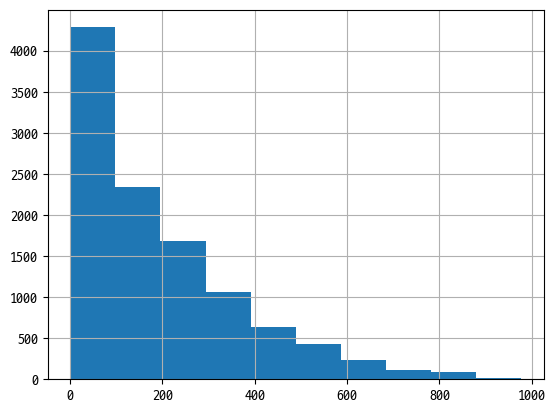

In [138]:
y.hist()

<AxesSubplot:>

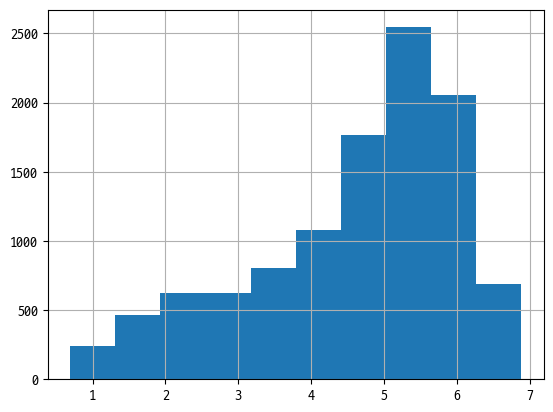

In [139]:
y_log = np.log1p(y)
y_log.hist()

In [140]:
X_train,X_test,y_train,y_test = train_test_split(X,y_log,test_size=0.3, random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
pred = lr_reg.predict(X_test)
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
evaluate_regr(y_test_exp,pred_exp)
# rmsle:1.165, rmse:140.900, mae:105.924

rmsle:1.017, rmse:162.594, mae:109.286


In [141]:
get_top_error_data(y_test_exp,pred_exp,n_tops=5)

      real_count  predicted_count   diff
2199       201.0            913.0  712.0
3151       798.0            114.0  684.0
2314       766.0             96.0  670.0
412        745.0             78.0  667.0
2003       770.0            106.0  664.0


<AxesSubplot:>

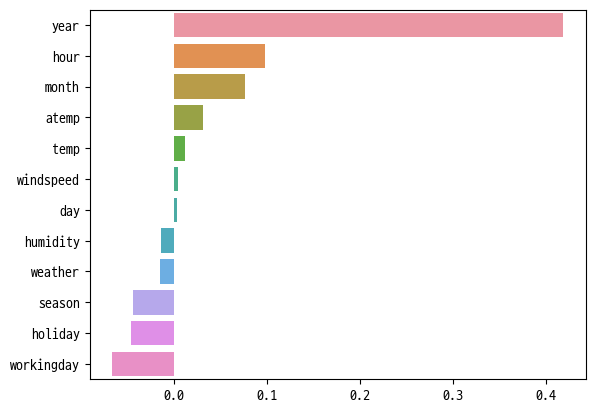

In [142]:
coef = pd.Series(lr_reg.coef_, index=X.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [144]:
X_ohe = pd.get_dummies(X, columns = ['year',
                                     'month',
                                     'day',
                                     'hour',
                                     'holiday',
                                     'workingday',
                                     'season',
                                     'weather'])

In [145]:
X_ohe.head(1)

,temp,atemp,humidity,windspeed,year_2011,year_2012,month_1,month_2,month_3,month_4,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0


In [146]:
X_train,X_test,y_train,y_test = train_test_split(X_ohe,
                                                 y_log,
                                                 test_size=0.3,
                                                 random_state=0)
def get_model_predict(model,
                      X_train,
                      X_test,
                      y_train,
                      y_test,
                      is_expm1=False):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###', model.__class__.__name__, '###')
    evaluate_regr(y_test,pred)

In [149]:
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)
for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,
                      X_train,
                      X_test,
                      y_train,
                      y_test,
                      is_expm1=True)
# rmsle:1.165, rmse:140.900, mae:105.924 - 선형회귀 적용
# rmsle:1.017, rmse:162.594, mae:109.286 - y값 log변환
# rmsle:0.590, rmse:97.688, mae:63.382 - LinearRegression
# rmsle:0.590, rmse:98.529, mae:63.893 - Ridge
# rmsle:0.635, rmse:113.219, mae:72.803 - Lasso


### LinearRegression ###
rmsle:0.590, rmse:97.688, mae:63.382
### Ridge ###
rmsle:0.590, rmse:98.529, mae:63.893
### Lasso ###
rmsle:0.635, rmse:113.219, mae:72.803


<AxesSubplot:>

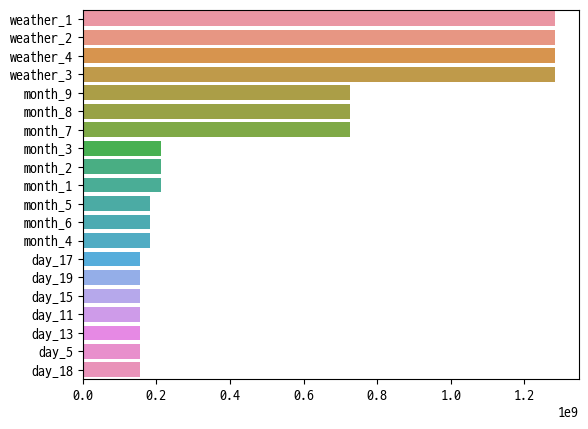

In [150]:
coef = pd.Series(lr_reg.coef_,index=X_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values,y=coef_sort.index)

<AxesSubplot:>

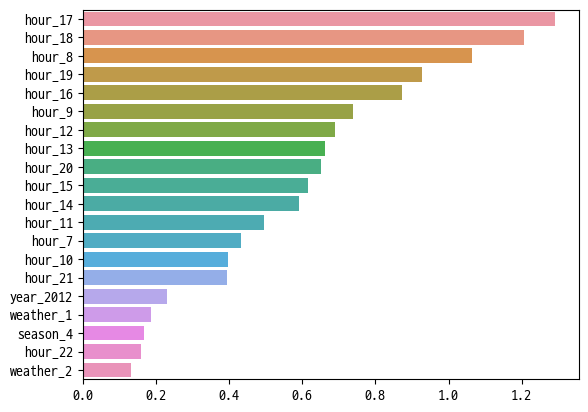

In [151]:
coef = pd.Series(ridge_reg.coef_,index=X_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values,y=coef_sort.index)

<AxesSubplot:>

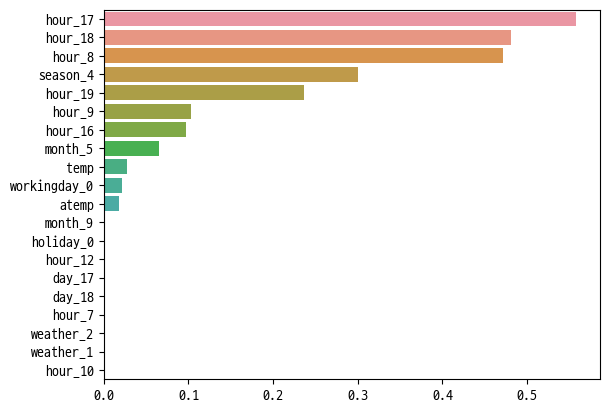

In [152]:
coef = pd.Series(lasso_reg.coef_,index=X_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values,y=coef_sort.index)